Many people agree that for people who work in programming, their interest in programming is important. Programming hobby may be relevant to some other features. But is that really the case?

Before validating this view with data, let's familiarize ourselves with datasets and feature ProgramHobby.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ProgramHobbyStats as phs
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print("The total number of rows in data set is {}.".format(df.shape[0]))

# First, we need to look at the feature ProgramHobby to see if there is some missing values.
program_hobby_df = df[df['ProgramHobby'].isnull()==False]
print("The number of rows with invalid ProgramHobby is {}."
      .format(sum(df['ProgramHobby'].isnull())))

The total number of rows in data set is 51392.
The number of rows with invalid ProgramHobby is 0.


Great, there are no missing values for this feature.

In [3]:
program_hobby_df = df[df['ProgramHobby'].isnull()==False]
program_hobby_df['ProgramHobby'].value_counts()

Yes, I program as a hobby                    24801
Yes, both                                    13756
No                                            9787
Yes, I contribute to open source projects     3048
Name: ProgramHobby, dtype: int64

In [4]:
# We also need to know what the ratios of each value of this feature is present.
program_hobby_df['ProgramHobby'].value_counts()/program_hobby_df.shape[0]

Yes, I program as a hobby                    0.482585
Yes, both                                    0.267668
No                                           0.190438
Yes, I contribute to open source projects    0.059309
Name: ProgramHobby, dtype: float64

In [5]:
# I want to see if most of the people on stackoverflow are professional developers.
program_hobby_df['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

It seems that most of the users on the StackOverflow website are professional developers. This is true for at least the users involved in the survey.

In [6]:
dev_df = program_hobby_df[program_hobby_df['Professional']=='Professional developer']
dev_df['ProgramHobby'].value_counts()

Yes, I program as a hobby                    16335
Yes, both                                    10021
No                                            7532
Yes, I contribute to open source projects     2243
Name: ProgramHobby, dtype: int64

In [7]:
# For professional developers, how many of them make programming a hobby?
dev_df['ProgramHobby'].value_counts()/dev_df.shape[0]

Yes, I program as a hobby                    0.452105
Yes, both                                    0.277352
No                                           0.208464
Yes, I contribute to open source projects    0.062080
Name: ProgramHobby, dtype: float64

Among professional developers, most people are interested in programming. It's in line with my instincts. Still, about `20%` people don't think of programming as a hobby. At the same time, there are not too many developers willing to contribute to open source projects, only nearly `34% `.

In [8]:
# I want to get a deeper understanding of the relationship between Professional and ProgramHobby.
pro_hobby_df = phs.gen_pro_hobby_df(program_hobby_df)
pro_hobby_df.shape

(51392, 4)

In [9]:
# View the ratios of the various values in column hobby.
pro_hobby_df['hobby'].value_counts().sort_index()/pro_hobby_df.shape[0]

0    0.249747
1    0.750253
Name: hobby, dtype: float64

The proportion of the values in the `hobby` column here are consistent with the proportions in the data frame `program_hobby_df`. The people of programming enthusiasts make up about `75%`.

In [10]:
# View the ratios of the various values in column contrib.
pro_hobby_df['contrib'].value_counts().sort_index()/pro_hobby_df.shape[0]

0    0.673023
1    0.326977
Name: contrib, dtype: float64

The proportion of the values in the `contrib` column here are consistent with the proportion in the data frame `program_hobby_df`. The people who contribute to the open source project account for about `33%`.

In [11]:
# View the ratios of the various values in column both.
pro_hobby_df['both'].value_counts().sort_index()/pro_hobby_df.shape[0]

0    0.732332
1    0.267668
Name: both, dtype: float64

In [12]:
# View the of dataframe.
pro_hobby_df.head()

,Professional,hobby,contrib,both
0,Student,1,1,1
1,Student,1,1,1
2,Professional developer,1,1,1
3,Professional non-developer who sometimes write...,1,1,1
4,Professional developer,1,0,0


In [13]:
# Create a new dataframe to store ratio data.
pro_vals = pro_hobby_df['Professional'].value_counts().sort_index()
ratios_df = phs.gen_hobby_ratios_df(pro_vals, pro_hobby_df)
ratios_df

,hobby,contrib,both
None of these,0.947484,0.354486,0.301969
Professional developer,0.729457,0.339432,0.277352
Professional non-developer who sometimes writes code,0.727626,0.297471,0.227821
Student,0.835846,0.287208,0.246960
Used to be a professional developer,0.733469,0.330621,0.261445


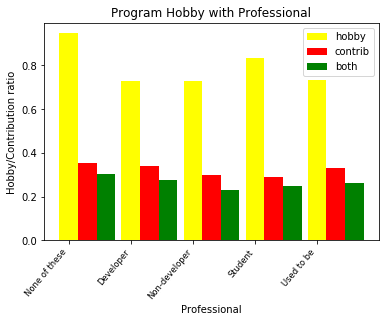

In [14]:
# Let's draw the graph.
x = np.arange(pro_vals.index.size)
labels = [phs.professional_map[str(v)] for v in pro_vals.index.values]
width = 0.3
 
# Draw a bar chart.
plt.bar(x=x, height=ratios_df['hobby'], width=width, color='yellow', label=u'hobby')
plt.bar(x=x+width, height=ratios_df['contrib'], width=width, color='red', label=u'contrib')
plt.bar(x=x+width*2, height=ratios_df['both'], width=width, color='green', label=u'both')
plt.xticks(x, labels, size='small', rotation=50, horizontalalignment='right')
plt.xlabel('Professional')
plt.ylabel('Hobby/Contribution ratio')
plt.title('Program Hobby with Professional')
plt.legend(loc='best')
plt.show()

I found a very interesting point. From the sample as a whole, there are not many people who choose `None of these` in terms of Professional, only `914`. However, there are a lot of people in this segment who claim to be programming lover or/and to open source project contributor. I can't explain it right now. While we may be able to find out why in the other details of this dataset, since this is not the focus of my analysis, do not delve into it. I think we can eliminate this group of data in future analysis. Because it seems to me that this part of the data may skew our analysis.

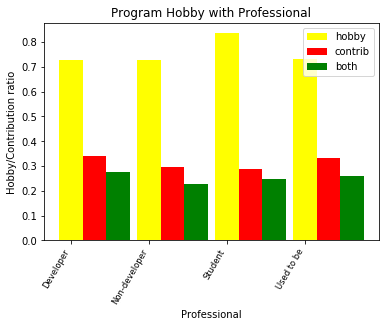

In [15]:
# Draw another picture and 
# ignore the portion of the data that corresponds to ‘None of these’.

pro_vals2 = pro_vals.drop('None of these')
ratios_df2 = ratios_df.drop('None of these')

x = np.arange(pro_vals2.index.size)
labels = [phs.professional_map[str(v)] for v in pro_vals2.index.values]
width = 0.3
 
# Draw a bar chart.
plt.bar(x=x, height=ratios_df2['hobby'], width=width, color='yellow', label=u'hobby')
plt.bar(x=x+width, height=ratios_df2['contrib'], width=width, color='red', label=u'contrib')
plt.bar(x=x+width*2, height=ratios_df2['both'], width=width, color='green', label=u'both')
plt.xticks(x, labels, size='small', rotation=60, horizontalalignment='right')
plt.xlabel('Professional')
plt.ylabel('Hobby/Contribution ratio')
plt.title('Program Hobby with Professional')
plt.legend(loc='best')
plt.show()

Let's focus on people who choose other options in terms of Professional. Take a look at the share of programming lover first. Obviously, in the student population, the proportion of people who love programming is larger, even larger than the proportion of professional developers. However, in the student community, the proportion of open source project contributors is minimal. In the professional developer community, the proportion of open source project contributors is significantly larger.

People do not necessarily contribute to open source projects because they love programming, either because of job needs or because they may be assignments assigned by teachers.
This can also be seen from the previous data statistics and diagrams, although there are fewer such people.
I think if a person is a programming fanatic, then he should be both a programming lover and an open source project contributor. In this respect, the proportion of programming fanatics in the professional developer community is the largest (except for those who choose `None of these`).

Because the subject of my study, "Is it really important for professional developers to love programming?", the audience for the article should be those who choose `Professional non-developer who sometimes writes code` or `Student` in  Professional way of the people. These people are most likely to become professional developers in the future, especially student groups. Of course, people who choose the `Professional Developer` option should also be audiences, and they should also be the focus of my study.